### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [42]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [43]:
#abrimos datos
data = pd.read_csv('data/drugLibTrain_raw.tsv', sep = '\t', index_col=0)

In [44]:
data.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [45]:
#pasamos los nombres de columna a minuscula
data.columns = data.columns.str.lower()

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3107 entries, 2202 to 2748
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   urldrugname        3107 non-null   object
 1   rating             3107 non-null   int64 
 2   effectiveness      3107 non-null   object
 3   sideeffects        3107 non-null   object
 4   condition          3106 non-null   object
 5   benefitsreview     3107 non-null   object
 6   sideeffectsreview  3105 non-null   object
 7   commentsreview     3099 non-null   object
dtypes: int64(1), object(7)
memory usage: 218.5+ KB


In [47]:
data.describe()

,rating
count,3107.000000
mean,7.006115
std,2.937582
min,1.000000
25%,5.000000
50%,8.000000
75%,9.000000
max,10.000000


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categoricas con pocas categorias (menos de 10)

In [48]:
# Verificamos número de categorías por cada columna
for col in data.columns:
    print(f'{col}: ', data[col].nunique())

urldrugname:  502
rating:  10
effectiveness:  5
sideeffects:  5
condition:  1426
benefitsreview:  3032
sideeffectsreview:  2814
commentsreview:  3047


In [49]:
data = data[['rating', 'effectiveness', 'sideeffects']]

#### Transforma las columnas categoricas

Transforma las columnas categoricas a numericas mediante dummies

In [50]:
# pd.get_dummies(data)

In [51]:
my_dict = {"Ineffective":0,
            "Marginally Effective":1,
            "Moderately Effective":2,
            "Considerably Effective":3,
            "Highly Effective":4}

In [52]:
data['effectiveness'] = data['effectiveness'].map(my_dict)

In [53]:
my_dict2 = {"No Side Effects":0,
            "Mild Side Effects":1,
            "Moderate Side Effects":2,
            "Severe Side Effects":3,
            "Extremely Severe Side Effects":4}

In [54]:
data['sideeffects'] = data['sideeffects'].map(my_dict2)

#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K. Evalua como mucho K = 20

#### Genera el K Means 

In [55]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [56]:
#instanciamos el modelo
k=20
models = [KMeans(n_clusters=i, random_state=42).fit(data) for i in range(2,k)]

In [57]:
#Calculamos el silhouette score
results = [silhouette_score(data, modelo.predict(data)) for modelo in models]

Mayor silhouette scores con K=2

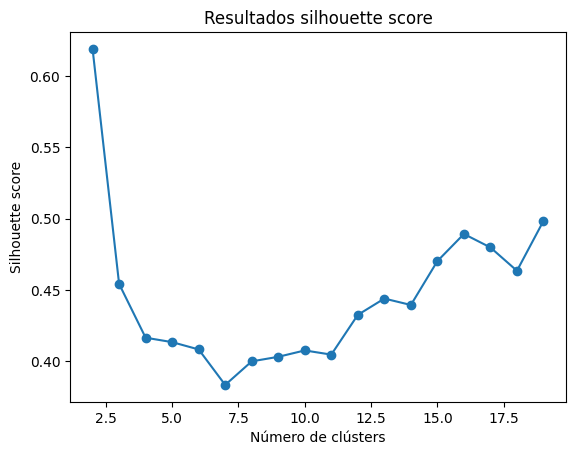

In [58]:
#Graficamos los resultados
plt.plot(range(2,k), results,marker='o')
plt.xlabel('Número de clústers')
plt.ylabel('Silhouette score')
plt.title('Resultados silhouette score')
plt.show();

Con el Elbow method comprobamos que k=2 sería la opción más adecuada

#### Muestra en un gráfico de tartas la distribución de los distintos clusters

In [59]:
inertias = [model.inertia_ for model in models]
inertias

[11137.736723639326,
 7254.022835331672,
 5691.624714323991,
 4805.42333264392,
 4233.709967967668,
 3775.656021891469,
 3312.1846473093897,
 2984.567361368439,
 2841.815548533025,
 2612.052327151952,
 2412.082927115801,
 2268.5109140505797,
 2155.6868408166815,
 2029.3145660247756,
 1933.181212760968,
 1849.00437787137,
 1788.8727950597008,
 1695.387926082856]

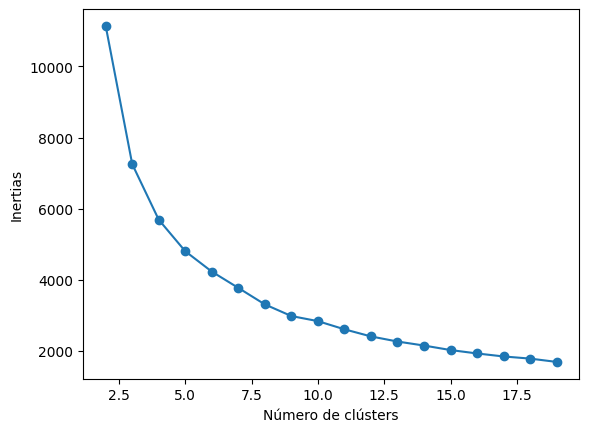

In [60]:
#Graficamos los resultados
plt.plot(range(2,k), inertias,marker='o')
plt.xlabel('Número de clústers')
plt.ylabel('Inertias')
plt.show();

In [61]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(data)

In [62]:
kmeans.labels_

array([0, 0, 1, ..., 0, 1, 0])

In [63]:
df_clusters = pd.DataFrame(kmeans.labels_, columns=['Cluster']) 

<AxesSubplot:ylabel='Cluster'>

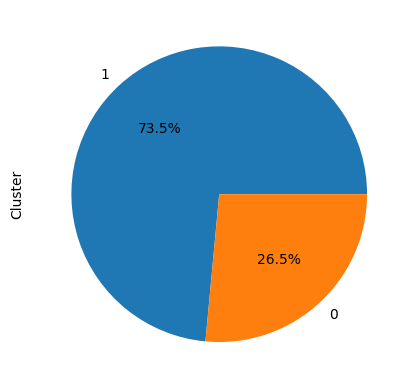

In [64]:
df_clusters['Cluster'].value_counts().plot.pie(autopct="%.1f%%")